<a href="https://colab.research.google.com/github/Untick/NetOptik/blob/Polyakov-Alexander-branch/Polyakov%20Alexander/Glasses_arm_tag_v0_1b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Установка зависимостей

In [1]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.142 🚀 Python-3.10.6 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.2/107.7 GB disk)


In [85]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.


In [92]:
from google.colab import drive
import cv2
from matplotlib import pyplot as plt
from ultralytics import YOLO
from PIL import Image
import os
import numpy as np
import pytesseract
import pandas as pd

In [3]:
PATH_DATA = '/content/drive/MyDrive/AI/datasets/glasses_arm_tags/'
PATH_DATA_YAML = PATH_DATA + 'data.yaml'

# Монтируем Google Диск
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!ls $PATH_DATA

data.yaml  test  train	valid  yolov8n.pt


In [5]:
%cd $PATH_DATA

/content/drive/MyDrive/AI/datasets/glasses_arm_tags


In [6]:
!cat $PATH_DATA_YAML

train: ../train/images
val: ../valid/images

names:
  0: arm_tag


## Utils

In [31]:
def resize_image_for_predict(file, IMG_W = 480, IMG_H=640):
  # Read the image uses OpenCV
  img = cv2.imread(file)

  # Resize the image
  resized_img = cv2.resize(img, (IMG_W, IMG_H))
  return cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)

In [48]:
def apply_bboxes_on_image(img, boxes):
  fig, ax = plt.subplots(1)
  ax.imshow(img)

  for box in boxes:
    x_min, y_min, x_max, y_max = box[:4]
    rect = plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)

  plt.axis('off')
  plt.show()

In [70]:
def crop_image_using_bboxes(image, boxes):
    cropped_images = []

    for box in boxes:
        x_min, y_min, x_max, y_max = box[:4]
        cropped_image = image[int(y_min):int(y_max), int(x_min):int(x_max)]
        cropped_images.append(cropped_image)

    return cropped_images

In [71]:
def display_image(image):
    plt.imshow(image)
    plt.axis('off')
    plt.show()

## Train

In [8]:
# Load a model
model = YOLO('yolov8n.pt')  # load a pretrained model (recommended for training)
model.train(data=PATH_DATA_YAML, epochs=30)
model.val()

Ultralytics YOLOv8.0.142 🚀 Python-3.10.6 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/AI/datasets/glasses_arm_tags/data.yaml, epochs=30, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f14d8d5b8e0>
fitness: 0.7047038109988756
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.67337])
names: {0: 'arm_tag'}
plot: True
results_dict: {'metrics/precision(B)': 0.9916613587278948, 'metrics/recall(B)': 0.95, 'metrics/mAP50(B)': 0.9866666666666666, 'metrics/mAP50-95(B)': 0.6733746048135655, 'fitness': 0.7047038109988756}
save_dir: PosixPath('runs/detect/val')
speed: {'preprocess': 1.5472173690795898, 'inference': 194.7418212890625, 'loss': 0.00035762786865234375, 'postprocess': 4.039633274078369}

## Model info

In [127]:
MODEL_PATH = '/content/drive/MyDrive/AI/datasets/glasses_arm_tags/runs/detect/train2/weights/best.pt'
model = YOLO(MODEL_PATH)  # Load the custom model

# Validate the model
metrics = model.val()
print('map50-95', metrics.box.map)
print('map50', metrics.box.map50)
print('map75', metrics.box.map75)

Ultralytics YOLOv8.0.142 🚀 Python-3.10.6 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients
val: Scanning /content/drive/MyDrive/AI/datasets/glasses_arm_tags/valid/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.42s/it]
                   all         20         20      0.992       0.95      0.987      0.673
Speed: 11.0ms preprocess, 214.7ms inference, 0.0ms loss, 3.6ms postprocess per image
Results saved to runs/detect/val3


map50-95 0.6733746048135655
map50 0.9866666666666666
map75 0.8535727676950999


на 10 эпохах результат

map50-95 0.5429090357640565

map50 0.947751937984496

map75 0.6137332605630089

на 30 эпохах

map50-95 0.6733746048135655

map50 0.9866666666666666

map75 0.8535727676950999

## Detect tags


0: 640x480 1 arm_tag, 234.8ms
Speed: 5.0ms preprocess, 234.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


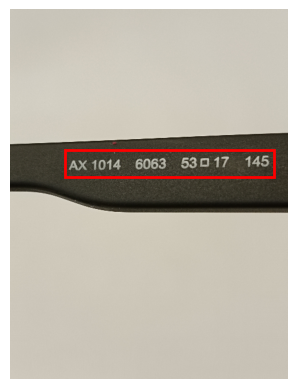

In [59]:
TEST_FILE = '/content/drive/MyDrive/AI/datasets/glasses_arm_tags/test/22.jpg'

# Load model
predict_model = YOLO(MODEL_PATH)

# Load image

resized_img = resize_image_for_predict(TEST_FILE)

# Predict
results = predict_model(resized_img)

# Write result
apply_bboxes_on_image(resized_img, results[0].boxes.data)

## Crop images

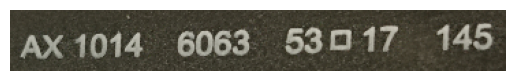

In [72]:
imgs = crop_image_using_bboxes(resized_img, results[0].boxes.data)

for img in imgs:
  display_image(img)

## Read text from image

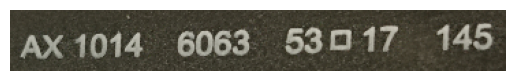

AX 1014 6063 63017 145



In [87]:
# Reat text uses pytesseract
extracted_text = pytesseract.image_to_string(imgs[0])

display_image(imgs[0])
print(extracted_text)

## Таблица аттрибутов

In [108]:
GID = 513939123
KEY = '1uT-ljE2M4dWYPygo2W80ayUMvGRDv6kf'

spreadsheet_url = f"https://docs.google.com/spreadsheets/d/{KEY}/export?format=csv&gid={GID}"

# Read the Google Spreadsheet data into the pandas DataFrame
df = pd.read_csv(spreadsheet_url)

# Clean empty data
df = df.drop(df.columns[[0, 1]], axis=1)
df.dropna(subset=[df.columns[1]], inplace=True)

# Display the DataFrame
df

,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,RB 4246V 5240 47*19 140,RB 4246V 5240,47.0,19.0,140.0,113.0
1,RB 5353 5628 50*19 145,RB 5353 5628,50.0,19.0,145.0,119.0
2,RB 3747V 2500 47*21 140,RB 3747V 2500,47.0,21.0,140.0,115.0
3,RB 7084 5635 54*18 140,RB 7084 5635,54.0,18.0,140.0,126.0
4,RB 7086 2000 51*18 140,RB 7086 2000,51.0,18.0,140.0,120.0
...,...,...,...,...,...,...
214,FPVN002 LIL 44*15 120,FPVN002 LIL,44.0,15.0,120.0,103.0
215,FPVN002 VLT 44*15 120,FPVN002 VLT,44.0,15.0,120.0,103.0
216,FPVN003 CHR 46*14 120,FPVN003 CHR,46.0,14.0,120.0,106.0
217,FPVN003 BLUE 46*14 120,FPVN003 BLUE,46.0,14.0,120.0,106.0


In [126]:
target_substring = extracted_text[:12]
print(target_substring)
# Use str.contains() on the second column to search for the substring
result_df = df[df.iloc[:, 1].str.contains(target_substring)]
result_df = df[df['Unnamed: 3'].str.contains(target_substring)]

# Display the results
result_df

AX 1014 6063


,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
21,AX 1014 6063 53*17 145,AX 1014 6063,53.0,17.0,145.0,123.0


## Выводы

Погрешности:

1.   Модель Yolo может ложно найти несколько меток на изображении.
2.   tesseract не верно интерпретирует символы например **квадрат** как **0** или цифру **5** как **6**
